# Parallel Coordinates in Python
A comprehensive guide to visualizing multivariate data using parallel coordinates for pattern discovery and anomaly detection.
What are Parallel Coordinates?
Parallel coordinates is a visualization technique for displaying high-dimensional data by:

Representing each dimension as a vertical axis
Arranging axes parallel to each other
Drawing each data point as a line crossing all axes

Key Insight: Patterns emerge as visual trends in the lines:

Parallel lines = positive correlation
Crossing lines = negative correlation
Isolated lines = outliers/anomalies



In [1]:
# Setup and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Set random seed for reproducibility
np.random.seed(42)

# Set style
plt.rcParams['figure.figsize'] = (14, 6)

1. Generate Sample Cost Data


In [2]:
# Normal cost records
df_normal = pd.DataFrame({
    'labor_cost': np.random.normal(50000, 8000, 150),
    'material_cost': np.random.normal(30000, 5000, 150),
    'overhead': np.random.normal(20000, 3000, 150),
    'shipping': np.random.normal(5000, 1000, 150),
    'utilities': np.random.normal(3000, 500, 150),
    'category': 'Normal'
})

# Anomalous cost records
df_anomaly = pd.DataFrame({
    'labor_cost': np.random.normal(80000, 10000, 50),
    'material_cost': np.random.normal(45000, 8000, 50),
    'overhead': np.random.normal(15000, 2000, 50),
    'shipping': np.random.normal(8000, 1500, 50),
    'utilities': np.random.normal(2000, 300, 50),
    'category': 'Anomaly'
})

# Combine datasets
df = pd.concat([df_normal, df_anomaly], ignore_index=True)

print(f"Total records: {len(df)}")
print(f"Normal: {len(df_normal)}, Anomaly: {len(df_anomaly)}")

Total records: 200
Normal: 150, Anomaly: 50


# Basic Parallel Coordinates Plot
What to look for:

Red lines (anomalies) should stand out from blue lines (normal)
Lines that don't follow the general pattern
Unusual intersections or trajectories

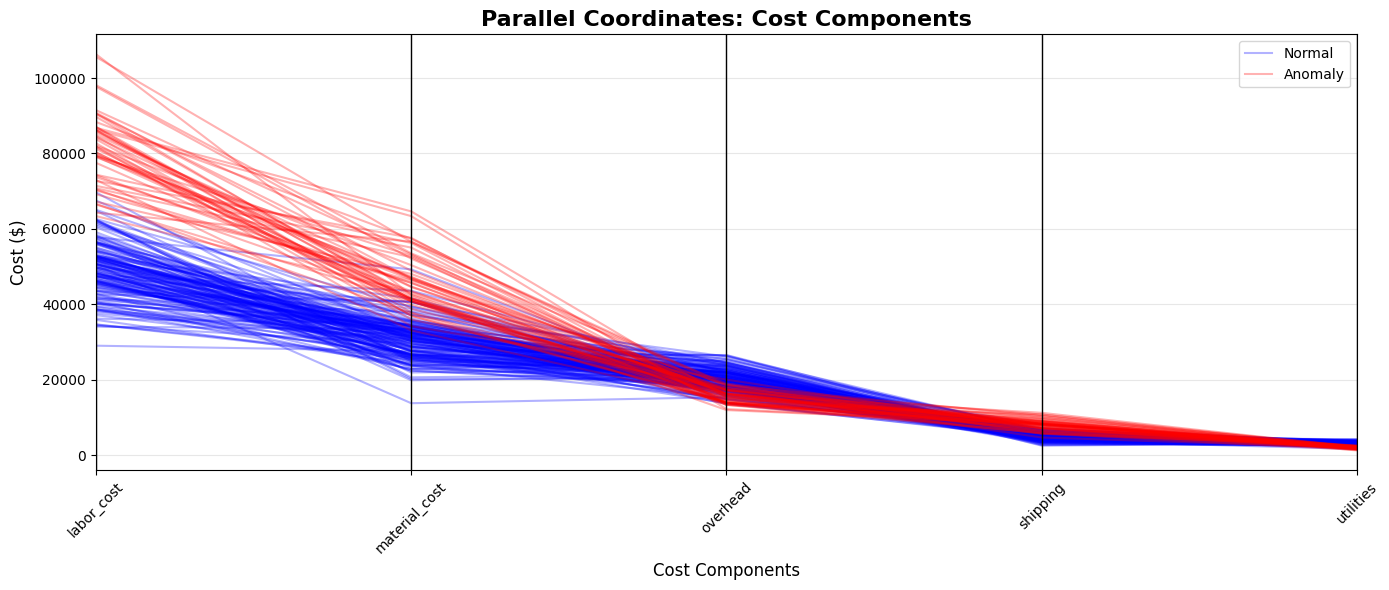

In [3]:
# Basic parallel coordinates plot
plt.figure(figsize=(14, 6))
parallel_coordinates(df, 'category', color=['blue', 'red'], alpha=0.3)
plt.title('Parallel Coordinates: Cost Components', fontsize=16, fontweight='bold')
plt.ylabel('Cost ($)', fontsize=12)
plt.xlabel('Cost Components', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Custom Parallel Coordinates Function


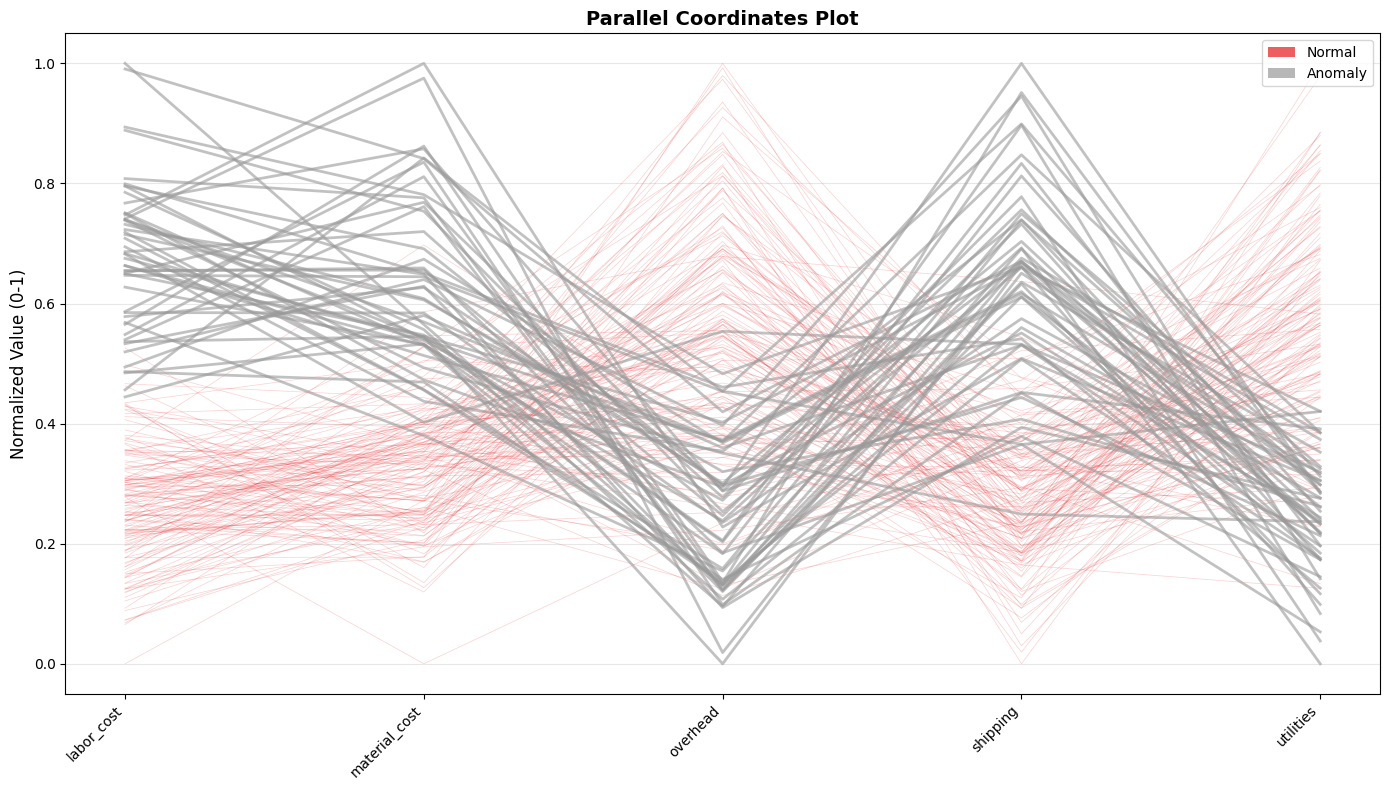

In [4]:
def create_parallel_coordinates(df, features, color_col=None, figsize=(14, 8)):
    """
    Create customized parallel coordinates plot

    Parameters:
    -----------
    df : DataFrame
    features : list of column names to plot
    color_col : column name for color coding (optional)
    figsize : tuple for figure size
    """

    # Normalize data to 0-1 range for each feature
    df_normalized = df[features].copy()
    for col in features:
        min_val = df_normalized[col].min()
        max_val = df_normalized[col].max()
        df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)

    # Set up the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Number of features
    n_features = len(features)
    x_positions = np.arange(n_features)

    # Color mapping
    if color_col:
        unique_categories = df[color_col].unique()
        colors = plt.cm.Set1(np.linspace(0, 1, len(unique_categories)))
        color_map = dict(zip(unique_categories, colors))

    # Plot each data point as a line
    for idx, row in df_normalized.iterrows():
        if color_col:
            color = color_map[df.loc[idx, color_col]]
            alpha = 0.6 if df.loc[idx, color_col] == 'Anomaly' else 0.2
            linewidth = 2 if df.loc[idx, color_col] == 'Anomaly' else 0.5
        else:
            color = 'blue'
            alpha = 0.3
            linewidth = 0.5

        # Create line through all axes
        ax.plot(x_positions, row.values, color=color, alpha=alpha, linewidth=linewidth)

    # Customize axes
    ax.set_xticks(x_positions)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.set_ylabel('Normalized Value (0-1)', fontsize=12)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(axis='y', alpha=0.3)

    # Add legend if color coding
    if color_col:
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color_map[cat], alpha=0.7, label=cat)
                          for cat in unique_categories]
        ax.legend(handles=legend_elements, loc='upper right')

    plt.title('Parallel Coordinates Plot', fontsize=14, fontweight='bold')
    plt.tight_layout()

    return fig, ax

# Use the custom function
features = ['labor_cost', 'material_cost', 'overhead', 'shipping', 'utilities']
fig, ax = create_parallel_coordinates(df, features, color_col='category')
plt.show()

# Interactive Parallel Coordinates with Plotly

Hover over lines to see exact values
Click legend to show/hide categories
Zoom and pan for detailed inspection


In [9]:
import plotly.express as px
import plotly.graph_objects as go

# More control with go.Parcoords
fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df['category'].map({'Normal': 0, 'Anomaly': 1}),
            colorscale=[[0, 'blue'], [1, 'red']],
            showscale=True,
            cmin=0,
            cmax=1
        ),
        dimensions=[
            dict(
                label='Labor Cost',
                values=df['labor_cost'],
                range=[df['labor_cost'].min(), df['labor_cost'].max()]
            ),
            dict(
                label='Material Cost',
                values=df['material_cost'],
                range=[df['material_cost'].min(), df['material_cost'].max()]
            ),
            dict(
                label='Overhead',
                values=df['overhead'],
                range=[df['overhead'].min(), df['overhead'].max()]
            ),
            dict(
                label='Shipping',
                values=df['shipping'],
                range=[df['shipping'].min(), df['shipping'].max()]
            ),
            dict(
                label='Utilities',
                values=df['utilities'],
                range=[df['utilities'].min(), df['utilities'].max()]
            )
        ]
    )
)

fig.update_layout(
    title='Cost Components - Parallel Coordinates (Drag on Axes to Filter)',
    height=600
)

fig.show()

# Identifying Correlation Patterns

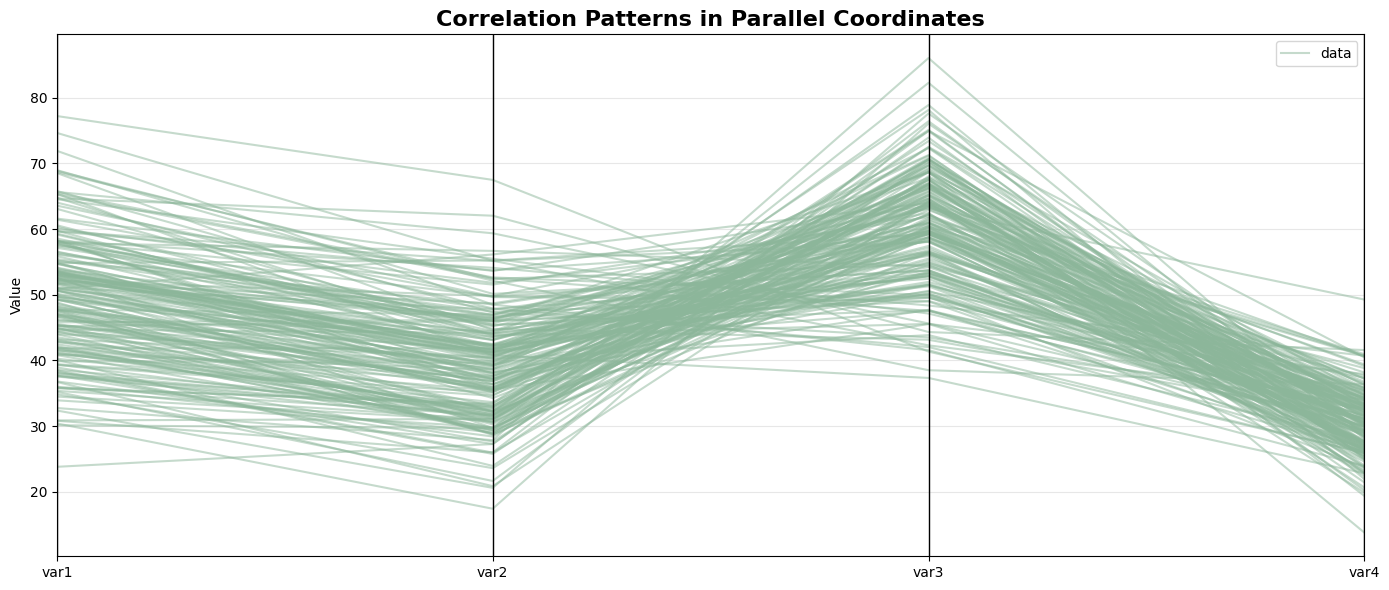

Pattern interpretation:
var1 → var2: Parallel lines (positive correlation)
var1 → var3: Crossing lines (negative correlation)
var1 → var4: Random pattern (no correlation)


In [11]:
# Generate data with different correlation patterns
np.random.seed(42)
n = 200

# Create different relationship types
df_patterns = pd.DataFrame({
    'var1': np.random.normal(50, 10, n),
    'var2': None,  # Will be positively correlated
    'var3': None,  # Will be negatively correlated
    'var4': np.random.normal(30, 5, n),  # No correlation
})

# Positive correlation with var1
df_patterns['var2'] = 0.8 * df_patterns['var1'] + np.random.normal(0, 5, n)

# Negative correlation with var1
df_patterns['var3'] = 100 - 0.8 * df_patterns['var1'] + np.random.normal(0, 5, n)

# Add category for coloring
df_patterns['type'] = 'data'

# Create parallel coordinates
plt.figure(figsize=(14, 6))
parallel_coordinates(df_patterns, 'type', alpha=0.5)
plt.title('Correlation Patterns in Parallel Coordinates', fontsize=16, fontweight='bold')
plt.ylabel('Value')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Pattern interpretation:")
print("var1 → var2: Parallel lines (positive correlation)")
print("var1 → var3: Crossing lines (negative correlation)")
print("var1 → var4: Random pattern (no correlation)")

# Summary
## Key Takeaways:
### Parallel coordinates is excellent for:

Visualizing 5-15 dimensional data in 2D
Spotting multivariate outliers
Understanding correlations between variables
Comparing groups visually
Explaining anomalies to non-technical stakeholders

### For cost anomaly detection specifically:

Shows which combinations of costs are unusual
Reveals feature relationships
Makes complex patterns visible
Interactive versions (Plotly) enable exploration

### Workflow:

Normalize/scale your features
Create basic parallel coordinates plot
Color by category (normal vs anomaly)
Analyze patterns visually
Combine with statistical methods (Isolation Forest, LOF)
Use interactive version for detailed exploration